<a href="https://colab.research.google.com/github/charleslien/osu_beatmap_generator/blob/main/mel_spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert `mp3` to `wav` 

In [ ]:
from os import path
from pydub import AudioSegment

# files                                                                         
src = "999645_Mrs._GREEN_APPLE_-_Inferno_(TV_Size)/te.mp3"
dst = "999645_Mrs._GREEN_APPLE_-_Inferno_(TV_Size)/te.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='999645_Mrs._GREEN_APPLE_-_Inferno_(TV_Size)/te.wav'>

# Get Mel Spectrogram from `wav` file

In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [ ]:
scale_file = "999645_Mrs._GREEN_APPLE_-_Inferno_(TV_Size)/te.wav"

In [ ]:
ipd.Audio(scale_file)

In [ ]:
# load audio files with librosa
scale, sr = librosa.load(scale_file)

In [ ]:
sr

22050

In [ ]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=sr, n_mels=40)

In [ ]:
filter_banks.shape

(40, 1025)

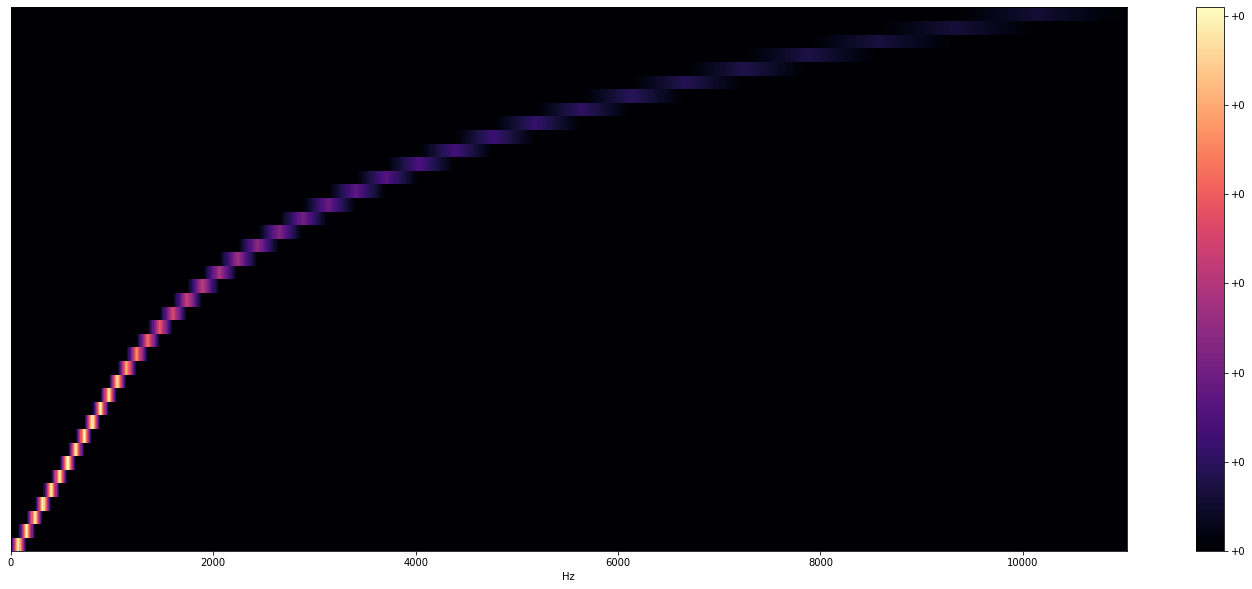

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=2048, win_length=512, hop_length=128, n_mels=40)

In [ ]:
mel_spectrogram.shape

(40, 15967)

In [ ]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [ ]:
log_mel_spectrogram.shape

(40, 15967)

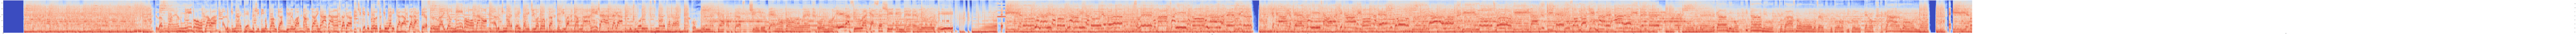

In [ ]:
plt.figure(figsize=(900, 10))
librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
ipd.Audio(scale_file)